Demo on a single pair of images

In [1]:

import sys
import os
os.chdir("/home/gzr/workspace/Template_Matching_v5_loftr")
from src.lightning.lightning_tm import PL_Tm
from src.config.default import get_cfg_defaults
import torch
import cv2
import torch.nn.functional as F
from  src.lightning.data import get_contours_points,pad_bottom_right
import torchvision.transforms as transforms
import numpy as np

In [2]:
config = get_cfg_defaults()
ckpt_path = '/media/gzr/Elements SE/ckpt/new_data/ablation/pos-fea/epoch=17-auc@1=0.175-auc@3=0.591-auc@5=0.748-auc@1=auc@10=0.874.ckpt'
model = PL_Tm(config, pretrain_ckpt = ckpt_path)
matcher = model.eval().cuda()


{'layer0': 'cd', 'layer1': 'ad', 'layer2': 'rd', 'layer3': 'cv', 'layer4': 'cd', 'layer5': 'ad', 'layer6': 'rd', 'layer7': 'cv', 'layer8': 'cd', 'layer9': 'ad', 'layer10': 'rd', 'layer11': 'cv', 'layer12': 'cd', 'layer13': 'ad', 'layer14': 'rd', 'layer15': 'cv'}
initialization done
=> loading checkpoint from './pidinet/trained_models/table5_pidinet-tiny-l.pth'
=> loaded checkpoint './pidinet/trained_models/table5_pidinet-tiny-l.pth' successfully
{'layer0': 'cd', 'layer1': 'ad', 'layer2': 'rd', 'layer3': 'cv', 'layer4': 'cd', 'layer5': 'ad', 'layer6': 'rd', 'layer7': 'cv', 'layer8': 'cd', 'layer9': 'ad', 'layer10': 'rd', 'layer11': 'cv', 'layer12': 'cd', 'layer13': 'ad', 'layer14': 'rd', 'layer15': 'cv'}
pretrain_ckpt /media/gzr/Elements SE/ckpt/new_data/ablation/pos-fea/epoch=17-auc@1=0.175-auc@3=0.591-auc@5=0.748-auc@1=auc@10=0.874.ckpt
backbone.edge_net.model.init_block.weight has beed load
backbone.edge_net.model.block1_1.conv1.weight has beed load
backbone.edge_net.model.block1_1.c

2022-10-10 10:01:47.224 | INFO     | src.lightning.lightning_tm:__init__:76 - Load '/media/gzr/Elements SE/ckpt/new_data/ablation/pos-fea/epoch=17-auc@1=0.175-auc@3=0.591-auc@5=0.748-auc@1=auc@10=0.874.ckpt' as pretrained checkpoint


edge_net.model.init_block.weight : freezeed
edge_net.model.block1_1.conv1.weight : freezeed
edge_net.model.block1_1.conv2.weight : freezeed
edge_net.model.block1_2.conv1.weight : freezeed
edge_net.model.block1_2.conv2.weight : freezeed
edge_net.model.block1_3.conv1.weight : freezeed
edge_net.model.block1_3.conv2.weight : freezeed
edge_net.model.block2_1.shortcut.weight : freezeed
edge_net.model.block2_1.shortcut.bias : freezeed
edge_net.model.block2_1.conv1.weight : freezeed
edge_net.model.block2_1.conv2.weight : freezeed
edge_net.model.block2_2.conv1.weight : freezeed
edge_net.model.block2_2.conv2.weight : freezeed
edge_net.model.block2_3.conv1.weight : freezeed
edge_net.model.block2_3.conv2.weight : freezeed
edge_net.model.block2_4.conv1.weight : freezeed
edge_net.model.block2_4.conv2.weight : freezeed
edge_net.model.block3_1.shortcut.weight : freezeed
edge_net.model.block3_1.shortcut.bias : freezeed
edge_net.model.block3_1.conv1.weight : freezeed
edge_net.model.block3_1.conv2.weight

In [3]:
def farthest_point_sample(xyz, npoint):
    """
    Input:
        xyz: pointcloud data, [B, N, 2]
        npoint: number of samples
    Return:
        centroids: sampled pointcloud index, [B, npoint]
    """
    device = xyz.device
    B, N, C = xyz.shape
    centroids = torch.zeros(B, npoint, dtype=torch.long).to(device)     # 采样点矩阵（B, npoint）
    distance = torch.ones(B, N).to(device) * 1e10                       # 采样点到所有点距离（B, N）
    batch_indices = torch.arange(B, dtype=torch.long).to(device)        # batch_size 数组
    farthest = torch.randint(0, N, (B,), dtype=torch.long).to(device)  # 初始时随机选择一点

    for i in range(npoint):
        centroids[:, i] = farthest                                      # 更新第i个最远点
        centroid = xyz[batch_indices, farthest, :].view(B, 1, 2)        # 取出这个最远点的xyz坐标
        dist = torch.sum((xyz - centroid) ** 2, -1).float()                   # 计算点集中的所有点到这个最远点的欧式距离
        mask = dist < distance
        distance[mask] = dist[mask]                                     # 更新distance，记录样本中每个点距离所有已出现的采样点的最小距离
        farthest = torch.max(distance, -1)[1]                           # 返回最远点索引

    return centroids

/tmp/ipykernel_16423/572282668.py:60: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  contours_points = torch.tensor(contours_points.astype(np.long))
/home/gzr/anaconda3/envs/loftr/lib/python3.8/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modif

value: tensor([0.0080, 0.0079, 0.0079, 0.0079, 0.0079, 0.0079, 0.0079, 0.0079, 0.0079,
        0.0079, 0.0079, 0.0079, 0.0079, 0.0079, 0.0079, 0.0079, 0.0079, 0.0079,
        0.0079, 0.0079, 0.0079, 0.0079, 0.0079, 0.0079, 0.0079, 0.0079, 0.0079,
        0.0078, 0.0078, 0.0078, 0.0078, 0.0078, 0.0078, 0.0078, 0.0078, 0.0078,
        0.0078, 0.0078, 0.0078, 0.0078, 0.0078, 0.0078, 0.0078, 0.0078, 0.0078,
        0.0078, 0.0078, 0.0078, 0.0078, 0.0078], device='cuda:0')
value: tensor([0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002,
        0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002,
        0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002,
        0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002,
        0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002,
        0.0002, 0.0002, 0.0002, 0.0002, 0.0002], device='cuda:0')
value: tensor([0.0003, 0.0003, 0.0003, 0.0003, 0.0003,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/home/gzr/anaconda3/envs/loftr/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


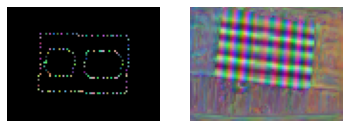

In [4]:
#1.pre config
Resize = [480,640] # h,w

H,W =Resize[0],Resize[1]
patch_size = 8  # coarse stage patch size is 8x8
num =128 # num of query points

img0_pth = "/home/gzr/Data/generative_steel/steel_dataset_now/0/images/test/20_template.png"
img1_pth = "/home/gzr/Data/generative_steel/steel_dataset_now/0/images/test/20_homo.png"

image0 = cv2.imread(img0_pth, cv2.IMREAD_GRAYSCALE) #tamplate
image0 = cv2.resize(image0, (Resize[1], Resize[0]))

image1 = cv2.imread(img1_pth, cv2.IMREAD_GRAYSCALE)
image1 = cv2.resize(image1, (Resize[1], Resize[0]))
image0_raw, image1_raw = image0, image1

scale = torch.tensor([image0.shape[1]/W,image0.shape[0]/H],dtype=torch.float)


image1_rgb = cv2.imread(img1_pth)
image1_rgb = cv2.cvtColor(image1_rgb, cv2.COLOR_BGR2RGB)
image1_rgb = cv2.resize(image1_rgb, (Resize[1], Resize[0]))
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])
transform = transforms.Compose([
            transforms.ToTensor(),
            normalize])
image1_rgb = transform(image1_rgb)[None] # c,h,w
image1_edge = cv2.Canny(image1, 5, 10)

#5. template resize

#6. get contours
image0 = cv2.Canny(image0, 5, 10)
contours_points = get_contours_points(image0)
contours_points = np.round(contours_points)//patch_size
contours_points = np.array(list(set([tuple(t) for t in contours_points])))

mask_0 = np.zeros(num, dtype=bool)

if num <= contours_points.shape[0]:
    indices = farthest_point_sample(torch.tensor(contours_points)[None, :], num)[0]
    contours_points = contours_points[indices]
    mask_0[:num] = True
else:
    num_pad = num - contours_points.shape[0]
    pad = np.random.choice(contours_points.shape[0], num_pad, replace=True)
    choice = np.concatenate([range(contours_points.shape[0]), pad])
    mask_0[:contours_points.shape[0]] = True
    contours_points = contours_points[choice, :]

contours_points[:,0] = np.clip(contours_points[:,0], 0, (W//patch_size)-1)
contours_points[:,1] = np.clip(contours_points[:,1], 0, (H//patch_size)-1)
contours_points = torch.tensor(contours_points.astype(np.long))


image0 = torch.from_numpy(image0)[None][None].cuda() / 255.
image1 = torch.from_numpy(image1)[None][None].cuda() / 255.
image1_edge = torch.from_numpy(image1_edge)[None][None].cuda() / 255.

device = image0.device
trans = torch.ones([3,3],device=device)
batch = {'dataset_name': ['synthetic'],'image0': image0, 'image1': image1,'image1_edge':image1_edge.cuda(),
         'image0_raw':torch.from_numpy(image0_raw)[None].cuda(),'image1_raw':torch.from_numpy(image1_raw)[None].cuda(),
         'scale':scale[None].cuda(),'c_points':contours_points[None].cuda(),
         'image1_rgb':image1_rgb.cuda(),'resolution':[patch_size],'trans':trans[None].cuda(),
         'pair_names': [(img0_pth,
                        img1_pth)]
         }

mask0 = torch.from_numpy(np.ones((image0.shape[2], image0.shape[3]), dtype=bool))
mask1 = torch.from_numpy(np.ones((image1.shape[2], image1.shape[3]), dtype=bool))

if mask1 is not None:  # img_padding is True
    coarse_scale = 1/patch_size
    if coarse_scale:
        [ts_mask_0, ts_mask_1] = F.interpolate(torch.stack([mask0, mask1], dim=0)[None].float(),
                                               scale_factor=coarse_scale,
                                               mode='nearest',
                                               recompute_scale_factor=False)[0].bool()

    batch.update({'mask1': ts_mask_1[None].cuda()})
    batch.update({'mask0': torch.from_numpy(mask_0)[None].cuda()}) # coarse_scale mask  [L]


# coarse stage matching
with torch.no_grad():
    matcher(batch)
    mkpts0 = batch['mkpts0_f'].cpu().numpy()
    mkpts1 = batch['mkpts1_f'].cpu().numpy()
    mconf = torch.ones(mkpts1.shape[0]).cpu().numpy()
    # mconf = batch['std'].cpu().numpy()
    img0 = (batch['image0'][0][0].cpu().numpy() * 255).round().astype(np.int32)
    img1 = (batch['image1'][0][0].cpu().numpy() * 255).round().astype(np.int32)
    img1_edge = (batch['edge'][0][0].cpu().detach().numpy() * 255).round().astype(np.int32)

    ave_aligned = ((batch['warped_template'][0][0]*0.5 + batch['image1'][0][0]*0.5).cpu().detach().numpy() * 255).round().astype(np.int32)

In [5]:
# Draw
import matplotlib.cm as cm
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('TkAgg')
from src.utils.plotting import make_matching_figure,make_matching_figure_4
import random
color = cm.jet(mconf)
print(color.shape)
text = [
    'Tm',
    'Matches: {}'.format(len(mkpts0)),
]

# if mkpts0.shape[0] > 30:
#     sample = random.sample(range(mkpts0.shape[0]), 30)  # random choice
#     mkpts0 = mkpts0[sample, :]
#     mkpts1 = mkpts1[sample, :]
#     color = color[sample, :]

# fig = make_matching_figure(img0, img1, mkpts0, mkpts1, color, text=text)
fig = make_matching_figure_4(
        ave_aligned,img0, img1,img1_edge ,mkpts0, mkpts1, color,
        kpts0=None, kpts1=None, text=text, dpi=75, path='./match.png')

(128, 4)


In [6]:
np.linspace(0.9, 1.1, 5)
np.linspace(-15, 15, 10)

array([-15.        , -11.66666667,  -8.33333333,  -5.        ,
        -1.66666667,   1.66666667,   5.        ,   8.33333333,
        11.66666667,  15.        ])